In [ ]:
import torch
import torchvision
from torch import nn, Tensor
import torchvision.transforms as transforms
import math
import torch.optim as optim
import time
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import model

In [ ]:
import time

# Note: This notebook requires mounting to Google Drive and Model, Util Files in order to re run

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [ ]:
#utils.py
import pickle
def save_vars(var,filepath):
  with open(filepath, 'wb') as f:
    pickle.dump(var, f)

def read_vars(filepath):
  with open(filepath, 'rb') as f:
    loaded = pickle.load(f)
  return loaded

In [ ]:
model_path = 'drive/MyDrive/OutputMl_Proj/checkpoints/'
metrics_path = 'drive/MyDrive/OutputMl_Proj/metrics/'

# Metrics

## 1. Accuracy

In [ ]:
# Read Lists
orig_cifar_10 = read_vars(metrics_path+'original/cifar10/'+'acc_50.pkl')
orig_cifar_100 = read_vars(metrics_path+'original/cifar100/'+'acc_50.pkl')
exp_cifar_10 = read_vars(metrics_path+'exp/cifar10/'+'acc_50.pkl')
exp_cifar_100 = read_vars(metrics_path+'exp/cifar100/'+'acc_50.pkl')

In [ ]:
# *100 for plotting as percentage
orig_cifar_10 = [i*100 for i in orig_cifar_10 ]
orig_cifar_100 = [i*100 for i in orig_cifar_100 ]
exp_cifar_10 = [i*100 for i in exp_cifar_10 ]
exp_cifar_100 = [i*100 for i in exp_cifar_100 ]

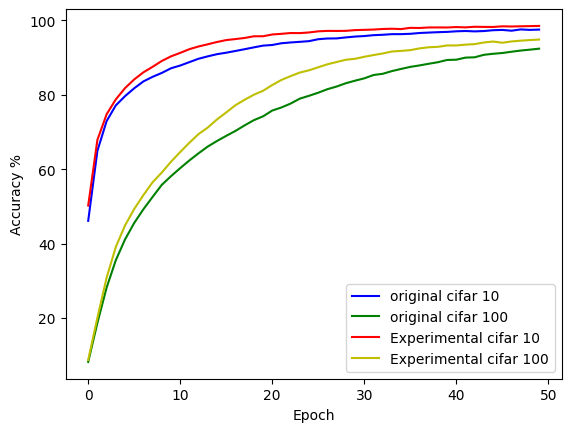

In [ ]:
plt.plot(orig_cifar_10, label='original cifar 10',c='b')
plt.plot(orig_cifar_100, label='original cifar 100',c='g')
plt.plot(exp_cifar_10, label='Experimental cifar 10',c='r')
plt.plot(exp_cifar_100, label='Experimental cifar 100',c='y')
plt.xlabel('Epoch')
plt.ylabel('Accuracy %')
plt.legend()
plt.title('')
plt.show()

## 2. Loss

In [ ]:
# Read Lists
orig_cifar_10 = read_vars(metrics_path+'original/cifar10/'+'loss_50.pkl')
orig_cifar_100 = read_vars(metrics_path+'original/cifar100/'+'loss_50.pkl')
exp_cifar_10 = read_vars(metrics_path+'exp/cifar10/'+'loss_50.pkl')
exp_cifar_100 = read_vars(metrics_path+'exp/cifar100/'+'loss_50.pkl')

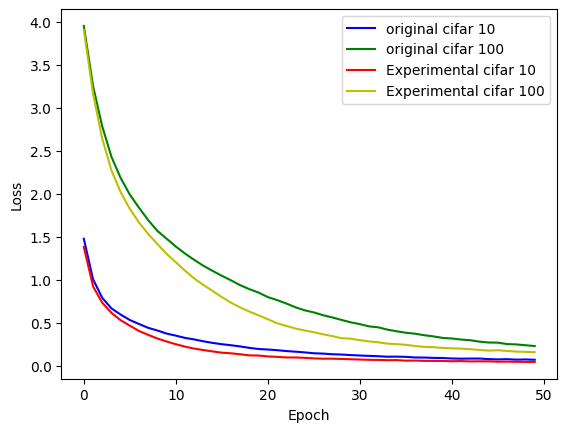

In [ ]:
plt.plot(orig_cifar_10, label='original cifar 10',c='b')
plt.plot(orig_cifar_100, label='original cifar 100',c='g')
plt.plot(exp_cifar_10, label='Experimental cifar 10',c='r')
plt.plot(exp_cifar_100, label='Experimental cifar 100',c='y')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

## 3. Time per Epoch

In [ ]:
# Read Lists
orig_cifar_10 = read_vars(metrics_path+'original/cifar10/'+'time_50.pkl')
orig_cifar_100 = read_vars(metrics_path+'original/cifar100/'+'time_50.pkl')
exp_cifar_10 = read_vars(metrics_path+'exp/cifar10/'+'time_50.pkl')
exp_cifar_100 = read_vars(metrics_path+'exp/cifar100/'+'time_50.pkl')

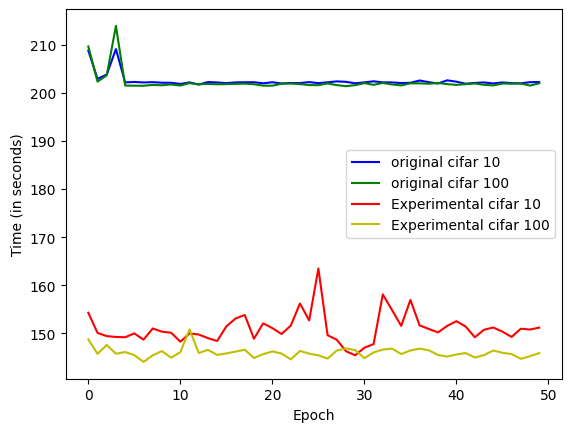

In [ ]:
plt.plot(orig_cifar_10, label='original cifar 10',c='b')
plt.plot(orig_cifar_100, label='original cifar 100',c='g')
plt.plot(exp_cifar_10, label='Experimental cifar 10',c='r')
plt.plot(exp_cifar_100, label='Experimental cifar 100',c='y')


plt.xlabel('Epoch')
plt.ylabel('Time (in seconds)')
plt.legend()

plt.show()

# Testing

# Original Model

## CIFAR 10

In [ ]:
batch_size=32
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Resize((224,224)),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transform)
valloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                        shuffle=True, num_workers=2)

Files already downloaded and verified


In [ ]:
y_true = []
y_pred = []
correct = 0
top5 = 0
total = 0
model = torch.load(model_path+'/original/cifar10/model_50.pt')
model.to(device)
model.eval()
with torch.no_grad():
    start_time = time.time()
    for data in valloader:
        images, labels = data
        y_true = y_true + labels.detach().numpy().tolist()
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        y_pred = y_pred + predicted.to('cpu').detach().numpy().tolist()
        correct += (predicted == labels).sum().item()
        # new
        label_list = labels.to('cpu').detach().numpy().tolist()
        pred_list = outputs.data.to('cpu').detach().numpy().tolist()
        for i in range(len(label_list)):
          temp = [[x,y] for x,y in enumerate(pred_list[i])]
          if label_list[i] in [j[0] for j in sorted(temp, key=lambda x:x[1], reverse=True)][0:5]:
            top5+=1

    end_time = time.time()
    total_time = end_time - start_time
print('Time Taken for Infering Test Data: {:.2f}s'.format(total_time))
print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')
print(f'Top 5 Accuracy of the network on the 10000 test images: {100 * top5 // total} %')

orig_cifar10_model = model

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Time Taken for Infering Test Data: 32.36s
Accuracy of the network on the 10000 test images: 90 %
Top 5 Accuracy of the network on the 10000 test images: 99 %


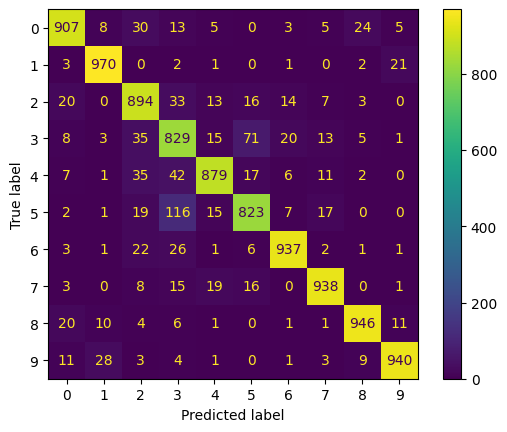

In [ ]:
cm = confusion_matrix(y_true, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [ ]:
param_size = 0
num_params = 0
for param in model.parameters():
  num_params += param.nelement()
  param_size += param.nelement() * param.element_size()
buffer_size = 0
for buffer in model.buffers():
  buffer_size += buffer.nelement() * buffer.element_size()
size_all_mb = (param_size + buffer_size) / 1024**2
print('model size: {:.3f}MB'.format(size_all_mb))
print('model params: {}'.format(num_params))

model size: 8.663MB
model params: 2236682


## CIFAR 100

In [ ]:
batch_size=32
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Resize((224,224)),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

testset = torchvision.datasets.CIFAR100(root='./data', train=False,
                                        download=True, transform=transform)
valloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                        shuffle=True, num_workers=2)

Files already downloaded and verified


In [ ]:
y_true = []
y_pred = []
correct = 0
total = 0
top5= 0 
model = torch.load(model_path+'/original/cifar100/model_50.pt')
model.to(device)
model.eval()
with torch.no_grad():
    start_time = time.time()
    for data in valloader:
        images, labels = data
        y_true = y_true + labels.detach().numpy().tolist()
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        y_pred = y_pred + predicted.to('cpu').detach().numpy().tolist()
        correct += (predicted == labels).sum().item()
        # new
        label_list = labels.to('cpu').detach().numpy().tolist()
        pred_list = outputs.data.to('cpu').detach().numpy().tolist()
        for i in range(len(label_list)):
          temp = [[x,y] for x,y in enumerate(pred_list[i])]
          if label_list[i] in [j[0] for j in sorted(temp, key=lambda x:x[1], reverse=True)][0:5]:
            top5+=1
    end_time = time.time()
    total_time = end_time - start_time
print('Time Taken for Infering Test Data: {:.2f}s'.format(total_time))
print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')
print(f'Top 5 Accuracy of the network on the 10000 test images: {100 * top5 // total} %')
orig_cifar100_model = model

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Time Taken for Infering Test Data: 26.57s
Accuracy of the network on the 10000 test images: 66 %
Top 5 Accuracy of the network on the 10000 test images: 89 %


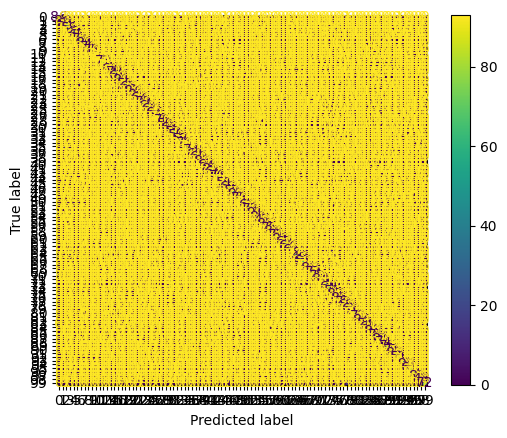

In [ ]:
cm = confusion_matrix(y_true, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [ ]:
param_size = 0
num_params = 0
for param in model.parameters():
  num_params += param.nelement()
  param_size += param.nelement() * param.element_size()
buffer_size = 0
for buffer in model.buffers():
  buffer_size += buffer.nelement() * buffer.element_size()
size_all_mb = (param_size + buffer_size) / 1024**2
print('model size: {:.3f}MB'.format(size_all_mb))
print('model params: {}'.format(num_params))

model size: 9.103MB
model params: 2351972


# Experimental

In [ ]:
import exper_model

## CIFAR 10

In [ ]:
batch_size=32
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transform)
valloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                        shuffle=True, num_workers=2)

Files already downloaded and verified


In [ ]:
y_true = []
y_pred = []
correct = 0
total = 0
top5 = 0
model = torch.load(model_path+'/exp/cifar10/model_50.pt')
model.to(device)
model.eval()
with torch.no_grad():
    start_time = time.time()
    for data in valloader:
        images, labels = data
        y_true = y_true + labels.detach().numpy().tolist()
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        y_pred = y_pred + predicted.to('cpu').detach().numpy().tolist()
        correct += (predicted == labels).sum().item()
        # new
        label_list = labels.to('cpu').detach().numpy().tolist()
        pred_list = outputs.data.to('cpu').detach().numpy().tolist()
        for i in range(len(label_list)):
          temp = [[x,y] for x,y in enumerate(pred_list[i])]
          if label_list[i] in [j[0] for j in sorted(temp, key=lambda x:x[1], reverse=True)][0:5]:
            top5+=1
    end_time = time.time()
    total_time = end_time - start_time
print('Time Taken for Infering Test Data: {:.2f}s'.format(total_time))
print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')
print(f'Top 5 Accuracy of the network on the 10000 test images: {100 * top5 // total} %')
exp_cifar10_model = model

Time Taken for Infering Test Data: 9.89s
Accuracy of the network on the 10000 test images: 87 %
Top 5 Accuracy of the network on the 10000 test images: 99 %


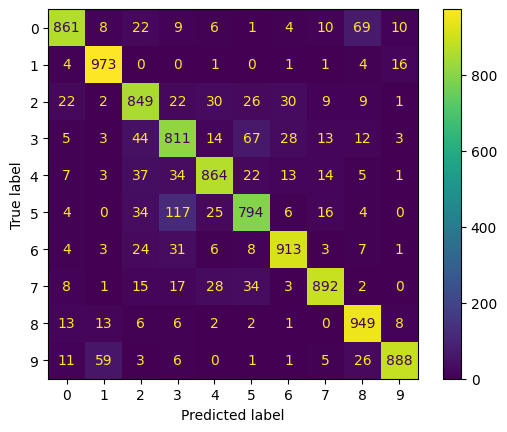

In [ ]:
cm = confusion_matrix(y_true, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [ ]:
param_size = 0
num_params = 0
for param in model.parameters():
  num_params += param.nelement()
  param_size += param.nelement() * param.element_size()
buffer_size = 0
for buffer in model.buffers():
  buffer_size += buffer.nelement() * buffer.element_size()
size_all_mb = (param_size + buffer_size) / 1024**2
print('model size: {:.3f}MB'.format(size_all_mb))
print('model params: {}'.format(num_params))

model size: 9.029MB
model params: 2333924


## CIFAR 100

In [ ]:
batch_size=32
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

testset = torchvision.datasets.CIFAR100(root='./data', train=False,
                                        download=True, transform=transform)
valloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                        shuffle=True, num_workers=2)

Files already downloaded and verified


In [ ]:
y_true = []
y_pred = []
correct = 0
top5 = 0
total = 0
model = torch.load(model_path+'/exp/cifar100/model_50.pt')
model.to(device)
model.eval()
with torch.no_grad():
    start_time = time.time()
    for data in valloader:
        images, labels = data
        y_true = y_true + labels.detach().numpy().tolist()
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        y_pred = y_pred + predicted.to('cpu').detach().numpy().tolist()
        correct += (predicted == labels).sum().item()
        # new
        label_list = labels.to('cpu').detach().numpy().tolist()
        pred_list = outputs.data.to('cpu').detach().numpy().tolist()
        for i in range(len(label_list)):
          temp = [[x,y] for x,y in enumerate(pred_list[i])]
          if label_list[i] in [j[0] for j in sorted(temp, key=lambda x:x[1], reverse=True)][0:5]:
            top5+=1
    end_time = time.time()
    total_time = end_time - start_time
print('Time Taken for Infering Test Data: {:.2f}s'.format(total_time))
print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')
print(f'Top 5 Accuracy of the network on the 10000 test images: {100 * top5 // total} %')
exp_cifar100_model = model

Time Taken for Infering Test Data: 8.21s
Accuracy of the network on the 10000 test images: 61 %
Top 5 Accuracy of the network on the 10000 test images: 86 %


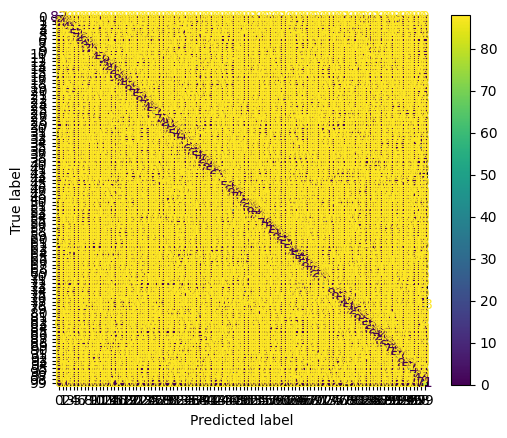

In [ ]:
cm = confusion_matrix(y_true, y_pred)
ConfusionMatrixDisplay(cm).plot()

# Model Size

In [ ]:
param_size = 0
num_params = 0
for param in model.parameters():
  num_params += param.nelement()
  param_size += param.nelement() * param.element_size()
buffer_size = 0
for buffer in model.buffers():
  buffer_size += buffer.nelement() * buffer.element_size()
size_all_mb = (param_size + buffer_size) / 1024**2
print('model size: {:.3f}MB'.format(size_all_mb))
print('model params: {}'.format(num_params))

model size: 9.029MB
model params: 2333924


# TEMPORARY

In [ ]:
# Training Acc
print(orig_cifar_10[-1])
print(orig_cifar_100[-1])
print(exp_cifar_10[-1])
print(exp_cifar_100[-1])

97.538
92.402
98.52
94.864


In [ ]:
# Training Time
print(orig_cifar_10[-1])
print(orig_cifar_100[-1])
print(exp_cifar_10[-1])
print(exp_cifar_100[-1])

202.26252388954163
202.01298761367798
151.17697763442993
145.87397146224976
